# Q
### Perform sentimental analysis on the Elon-musk tweets, obtained from twitter

#### Importing datasets 

In [1]:
import pandas as pd
import numpy as np

In [2]:
temp = pd.read_csv('Elon_musk.csv',encoding='cp1252')
temp

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


#### EDA 

In [3]:
temp['Text'].isna().sum()

0

In [4]:
from wordcloud import WordCloud

In [5]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
lines=[]
for sent in temp.Text:
    lines.append(sent)

In [7]:
import re
cleanlines = re.sub('[^a-zA-Z]',' ',str(lines)).lower()

from nltk.tokenize import word_tokenize
words = word_tokenize(cleanlines)

In [8]:
import matplotlib.pyplot as plt

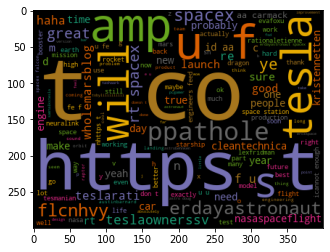

In [9]:
wc_words = ' '.join(words)
wc = WordCloud(width = 400, height = 300, max_words = 150, colormap = "Dark2").generate(wc_words)
plt.imshow(wc)

#### Data cleaning 

In [10]:
#regularexpression
import re

In [11]:
#tweet_preprocessor
import preprocessor as p 

In [12]:
pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [13]:
re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(var):
    var = p.clean(var)
    #var = re.sub(r'#', '', var)
    var = re.sub('[0-9]', '', var.lower())
    var = re.sub('_', '', var)
    var = re_without_space.sub('', var)
    var = re_with_space.sub(' ', var)
    return var

In [14]:
temp['Text_clean'] = temp['Text'].apply(cleantext)

In [15]:
temp.shape

(1999, 3)

#### Importing Stopwords, positive words & negative words

In [16]:
from nltk.tokenize import word_tokenize

In [18]:
#stopwords
sw = open('stop.txt')
stopwords = sw.read().split('\n')
stopwords

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [19]:
#positivewords
pw = open('positive-words.txt')
positivewords = pw.read().split('\n')
positivewords

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [20]:
#negativewords
nw = open('negative-words.txt')
negativewords = nw.read().split('\n')
negativewords

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

#### Positive Score

In [21]:
#positive_score
def positive_score(var):
    p =[]
    tokens = word_tokenize(var)
    for j in tokens:
        if j in positivewords:
            p.append(j)
    return len(p)        

In [22]:
temp['positive_score'] = temp['Text_clean'].apply(positive_score)

In [23]:
temp['positive_score'].nunique()

5

#### Negative Score 

In [24]:
#negative_score
def negative_score(var):
    p =[]
    tokens = word_tokenize(var)
    for j in tokens:
        if j in negativewords:
            p.append(j)
    return len(p) 

In [25]:
temp['negative_score'] = temp['Text_clean'].apply(negative_score)

In [26]:
temp['negative_score'].nunique()

5

In [27]:
temp.shape

(1999, 5)

#### Polarity Score 

In [28]:
#polarity
def polarity(p,n):
    x = (p-n)/((p+n)+0.000001)
    return x 

In [29]:
temp['polarity_score'] = polarity(temp['positive_score'],temp['negative_score'])

In [30]:
temp['polarity_score'].unique()

array([ 0.        ,  0.999999  ,  0.9999995 , -0.999999  , -0.9999995 ,
        0.33333322, -0.99999967,  0.99999967,  0.49999988, -0.33333322,
        0.99999975, -0.49999988, -0.19999996, -0.99999975])

#### Subjectivity  

In [31]:
def totalwords(var):
    p =[]
    tokens = word_tokenize(var)
    for i in tokens:
        if i not in stopwords:
            p.append(i)
    return len(p)

In [32]:
temp['number_words'] = temp['Text_clean'].apply(totalwords)

In [33]:
def subjectivity(p,n,t):
    x = (p+n)/(t+0.000001)
    return x

In [34]:
temp['subjectivity'] = subjectivity(temp['positive_score'],temp['negative_score'],temp['number_words'])

#### Sentiment 

In [35]:
def sentiment(var):
    if var < -0.5:
        return 'Most Negative'
    elif var >= -0.5 and var < 0:
        return 'Negative'
    elif var ==0:
        return 'Neutral'
    elif var > 0 and var < 0.5:
        return 'Positive'
    else:
        return 'Most Positive'

In [36]:
temp['Sentiment'] = temp['polarity_score'].apply(sentiment)

#### Final Output 

In [37]:
output = temp.drop(['Unnamed: 0','Text'], axis = 1)

In [38]:
output

,Text_clean,positive_score,negative_score,polarity_score,number_words,subjectivity,Sentiment
0,im an alien,0,0,0.000000,2,0.000000,Neutral
1,ray tracing on cyberpunk with hdr is next leve...,0,0,0.000000,5,0.000000,Neutral
2,great interview,1,0,0.999999,2,0.500000,Most Positive
3,doge is underestimated,0,0,0.000000,2,0.000000,Neutral
4,congratulations tesla china for amazing execut...,2,0,1.000000,6,0.333333,Most Positive
...,...,...,...,...,...,...,...
1994,true it sounds so surreal but the negative pro...,2,2,0.000000,10,0.400000,Neutral
1995,make sure to read ur terms &amp conditions bef...,0,0,0.000000,9,0.000000,Neutral
1996,samwise gamgee,0,0,0.000000,2,0.000000,Neutral
1997,altho dumb and dumber is u+fu+f,0,1,-0.999999,4,0.250000,Most Negative


In [39]:
output.to_csv('Text Mining - Elon Musk.csv')

#### Visualizing Output 

<AxesSubplot:ylabel='Sentiment'>

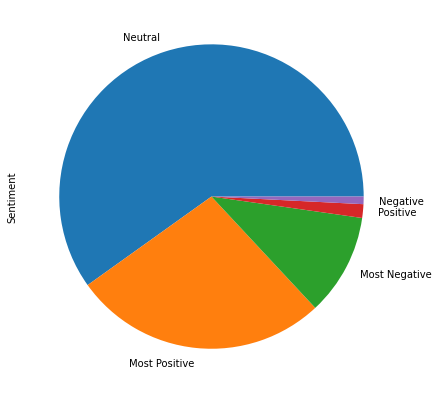

In [40]:
import seaborn as sns
temp['Sentiment'].value_counts().plot(kind='pie', figsize = (15,7))